In [1]:
import numpy as np
import pylab as plt
%matplotlib inline

In [2]:
#2d gaussian
def lnprob(theta,sigma):
    x, y = theta[0], theta[1]
    #linear version 1/np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x**2+y**2)/(2. * sigma**2))
    return -0.5 * np.sum(((x)**2 + (y)**2)/(2. * sigma**2))

In [3]:
import emcee

In [4]:
# set up number of dimensions, number of walkers, and initial state
ndim, nwalkers = 2, 100
p0 = [10+np.random.rand(ndim) for i in range(nwalkers)]
#print(p0)

In [5]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[0.5])
sampler.run_mcmc(p0, 1000)

(array([[-0.26947342, -0.21850108],
        [ 0.14104332, -0.59469276],
        [ 1.16772509,  0.60212308],
        [ 1.74297206, -0.4923362 ],
        [ 0.96993967, -0.21520631],
        [-0.72669737, -0.12321428],
        [-0.71983118,  0.51652562],
        [ 0.56242918, -0.06220203],
        [-0.51979727,  0.09881683],
        [ 0.3767379 , -1.46723498],
        [ 0.54274494,  1.00169786],
        [-0.3129038 ,  0.21690838],
        [ 0.14815222,  1.1096948 ],
        [ 0.15174132,  0.52440467],
        [ 0.55006864,  1.19540035],
        [ 1.26344948, -0.82170239],
        [-1.36511439,  0.30938949],
        [-0.08895898,  0.19277736],
        [-0.35781709,  0.48521987],
        [-0.19825114,  0.85092948],
        [ 0.72978842, -0.05551697],
        [ 0.2022186 , -0.58143419],
        [ 0.60633443,  0.1448309 ],
        [-0.08825784, -0.22908696],
        [-0.72718663, -0.34689252],
        [-0.74877302, -0.56478272],
        [ 0.48265009, -0.33981233],
        [-0.21672466, -0.214

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


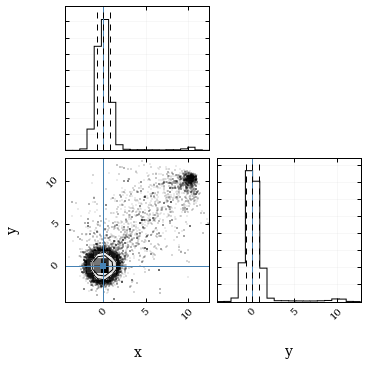

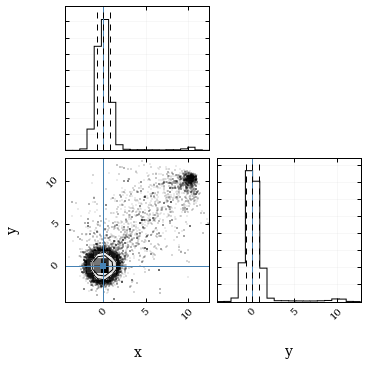

In [6]:
import corner
corner.corner(sampler.flatchain, labels=['$x$', '$y$'],quantiles=[0.16, 0.5, 0.84], truths=[0.,0.])
#, levels=(1-np.exp(-0.5),))

In [7]:
sampler.chain.shape
sampler.flatchain.shape

(100000, 2)

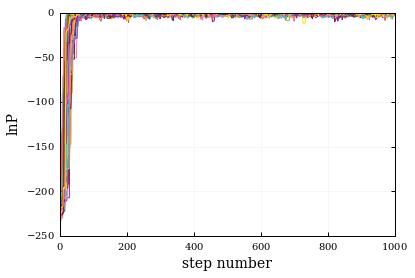

In [8]:
[plt.plot(sampler.lnprobability[i,:]) for i in range(100)]
plt.xlabel('step number')
plt.ylabel('lnP')

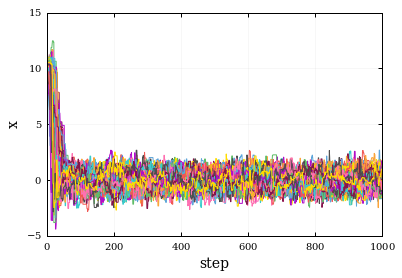

In [9]:
[plt.plot(sampler.chain[i,:,0]) for i in range(100)]
#[plt.plot(sampler.chain[i,:,0]) for i in range(sampler.chain.shape[0])]
plt.xlabel('step')
plt.ylabel('x')

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


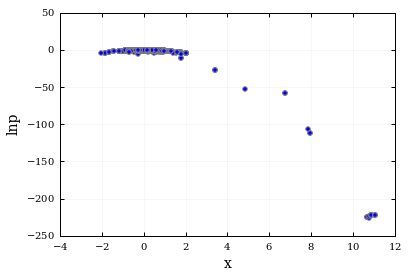

In [10]:
[plt.scatter(sampler.chain[i,:,0], sampler.lnprobability[i,:]) for i in range(1)]
plt.xlabel('x')
plt.ylabel('lnp')

In [12]:
sampler.get_autocorr_time()

array([ 34.88753109,  37.78685551])